In [24]:
import yfinance as yf
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from scipy.special import roots_legendre
from matplotlib import pyplot as plt

In [25]:
# Define the underlying index (S&P 500)
ticker = "^SPX"  # S&P 500 index on Yahoo Finance
spx = yf.Ticker(ticker)

# Fetch option expiration dates
expirations = spx.options
print("Available Expirations:", expirations)

# Find the expiration closest to 43 trading days from today
target_days_to_expiry = 43
today = datetime.today()

# Convert expiration dates to datetime format and compute days to expiration
exp_dates = [datetime.strptime(date, "%Y-%m-%d") for date in expirations]
days_to_expiry = [(date - today).days for date in exp_dates]

# Find the expiration closest to 43 days
closest_expiry_idx = np.argmin([abs(d - target_days_to_expiry) for d in days_to_expiry])
chosen_expiration = expirations[closest_expiry_idx]
print(f"Using expiration: {chosen_expiration}")

# Get the option chain for the chosen expiration
option_chain = spx.option_chain(chosen_expiration)
calls = option_chain.calls
puts = option_chain.puts

# Select only relevant columns (strike, bid, ask, last price, implied vol)
calls = calls[["strike", "bid", "ask", "lastPrice", "impliedVolatility"]]
puts = puts[["strike", "bid", "ask", "lastPrice", "impliedVolatility"]]

# Compute mid-price as average of bid-ask
calls["midPrice"] = (calls["bid"] + calls["ask"]) / 2
puts["midPrice"] = (puts["bid"] + puts["ask"]) / 2

# Save to CSV for later use
calls.to_csv("spx_calls.csv", index=False)
puts.to_csv("spx_puts.csv", index=False)

print("Data saved: spx_calls.csv and spx_puts.csv")

Available Expirations: ('2025-03-04', '2025-03-05', '2025-03-06', '2025-03-07', '2025-03-10', '2025-03-11', '2025-03-12', '2025-03-13', '2025-03-14', '2025-03-17', '2025-03-18', '2025-03-19', '2025-03-20', '2025-03-21', '2025-03-24', '2025-03-25', '2025-03-26', '2025-03-27', '2025-03-28', '2025-03-31', '2025-04-01', '2025-04-02', '2025-04-03', '2025-04-04', '2025-04-07', '2025-04-08', '2025-04-11', '2025-04-17', '2025-04-30', '2025-05-16', '2025-05-30', '2025-06-20', '2025-06-30', '2025-07-18', '2025-07-31', '2025-08-15', '2025-09-19', '2025-09-30', '2025-10-17', '2025-11-21', '2025-12-19', '2025-12-31', '2026-01-16', '2026-02-20', '2026-03-20', '2026-06-18', '2026-12-18', '2027-12-17', '2028-12-15', '2029-12-21', '2030-12-20')
Using expiration: 2025-04-17
Data saved: spx_calls.csv and spx_puts.csv


<ipython-input-25-0fca390e7e0f>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  calls["midPrice"] = (calls["bid"] + calls["ask"]) / 2
<ipython-input-25-0fca390e7e0f>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  puts["midPrice"] = (puts["bid"] + puts["ask"]) / 2


In [26]:
spx_calls_data = pd.read_csv("spx_calls.csv")
spx_puts_data = pd.read_csv("spx_puts.csv")

In [27]:
spx_calls_data.head()

,strike,bid,ask,lastPrice,impliedVolatility,midPrice
0,200.0,5622.7,5639.4,5812.96,0.000010,5631.05
1,400.0,5527.1,5559.1,5641.73,5.839022,5543.10
2,600.0,5432.3,5464.2,5220.80,6.067874,5448.25
3,800.0,5027.7,5045.1,5082.61,1.562502,5036.40
4,1000.0,4828.1,4845.1,4943.35,1.382816,4836.60


In [28]:
spx_puts_data.head()

,strike,bid,ask,lastPrice,impliedVolatility,midPrice
0,200.0,0.0,0.05,0.05,2.609378,0.025
1,400.0,0.0,0.15,0.05,2.207036,0.075
2,600.0,0.0,0.05,0.05,1.734376,0.025
3,800.0,0.0,0.10,0.05,1.582033,0.050
4,1000.0,0.0,0.15,0.08,1.445315,0.075


In [29]:
# Load the original call option data
calls = pd.read_csv("spx_calls.csv")

# Print the first few rows
print(calls.head())

# Print available strike price range
print("Available Strike Prices:", calls["strike"].min(), "to", calls["strike"].max())

# Show unique strike values
print("Unique Strikes:", sorted(calls["strike"].unique()))

   strike     bid     ask  lastPrice  impliedVolatility  midPrice
0   200.0  5622.7  5639.4    5812.96           0.000010   5631.05
1   400.0  5527.1  5559.1    5641.73           5.839022   5543.10
2   600.0  5432.3  5464.2    5220.80           6.067874   5448.25
3   800.0  5027.7  5045.1    5082.61           1.562502   5036.40
4  1000.0  4828.1  4845.1    4943.35           1.382816   4836.60
Available Strike Prices: 200.0 to 11000.0
Unique Strikes: [200.0, 400.0, 600.0, 800.0, 1000.0, 1200.0, 1400.0, 1600.0, 1800.0, 2000.0, 2200.0, 2900.0, 3000.0, 3150.0, 3200.0, 3300.0, 3350.0, 3400.0, 3450.0, 3500.0, 3600.0, 3700.0, 3725.0, 3800.0, 3900.0, 4000.0, 4025.0, 4050.0, 4100.0, 4150.0, 4200.0, 4225.0, 4300.0, 4325.0, 4400.0, 4425.0, 4500.0, 4525.0, 4600.0, 4650.0, 4700.0, 4725.0, 4750.0, 4775.0, 4800.0, 4825.0, 4840.0, 4850.0, 4875.0, 4900.0, 4925.0, 4950.0, 4975.0, 5000.0, 5025.0, 5050.0, 5075.0, 5100.0, 5120.0, 5125.0, 5130.0, 5140.0, 5150.0, 5160.0, 5175.0, 5180.0, 5200.0, 5210.0, 5220.

Iter=1, ||delta sigma||=2.183637e+02
Iter=2, ||delta sigma||=8.615245e+03
Iter=3, ||delta sigma||=8.619456e+03
Final sigma(K): [-10.  82. 125. 120. 116.]


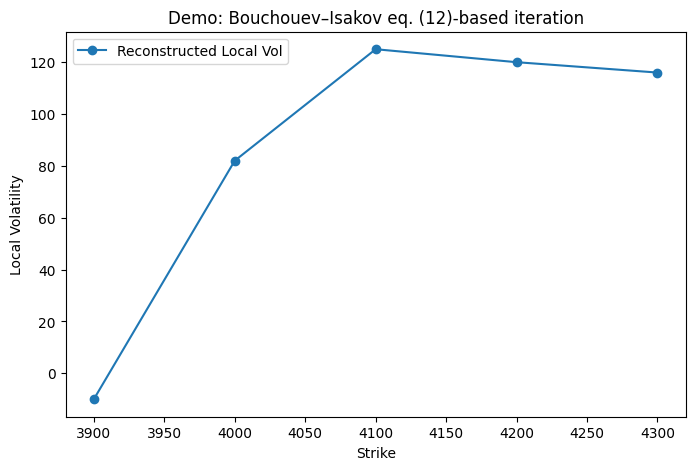

In [35]:
import numpy as np
import pandas as pd
from math import log, exp, sqrt, pi
import matplotlib.pyplot as plt
from scipy.special import roots_legendre



#####################################################################
#   Helper: trapezoidal 1D integration
#####################################################################
def trapz_1d(fvals, xvals):
    """Trapezoidal rule in 1D."""
    return np.trapz(fvals, xvals)


#####################################################################
#   1) I_sigma(K) from eq. (12)
#####################################################################
def I_sigma(K, x, T_minus_tstar, sigmaK, nSteps=50):
    """
    I_sigma(K) = (K / sqrt(2*pi)) * \int_0^{sigma(K)*sqrt(T-t*} exp(-(ln(x/K))^2 / (2 s^2)) ds

    We'll do a numeric integral over s in [0, sMax], where sMax = sigmaK * sqrt(T_minus_tstar).
    """
    if sigmaK <= 1e-12:
        return 0.0

    sMax = sigmaK * np.sqrt(T_minus_tstar)
    if sMax <= 1e-12:
        return 0.0

    # define the integrand
    ln_ratio = np.log(x / K)  # ln(x/K) fixed
    def integrand(s):
        # if s is zero, watch out for dividing by zero
        # but we don't integrate from zero exactly; we do small steps
        if s <= 0:
            return 0
        return np.exp(- (ln_ratio**2) / (2.0 * s**2))

    # set up discrete points for s
    sgrid = np.linspace(0, sMax, nSteps)
    fvals = np.array([integrand(s) for s in sgrid])

    integral_val = trapz_1d(fvals, sgrid)
    return (K / np.sqrt(2.0 * pi)) * integral_val


#####################################################################
#   2) I1_sigma(K, nu) from eq. (12) - the double integral
#####################################################################
def I1_sigma(K, nu, x, T_minus_tstar, sigmaK, sigmanu, R, D,
             nTau=20, nZeta=20):
    """
    I1_sigma(K, nu):
      = (K / [4 pi nu sigma(K) sigma(nu)]) * \int_{0}^{T-t*} \int_{0}^{tau}
           [some bracket expression] *
           exp(- (ln(x/nu))^2 / [2 (tau-zeta) sigma^2(nu)])
           exp(- (ln(nu/K))^2 / [2 zeta sigma^2(K)])
           1 / sqrt((tau-zeta) zeta)
        d zeta d tau

    We'll do a 2D trapezoidal integration over tau in [0, T_minus_tstar],
    and zeta in [0, tau].
    """
    # If either sigmaK or sigmanu is near 0, short-circuit
    if sigmaK < 1e-12 or sigmanu < 1e-12:
        return 0.0

    # define the bracket
    def bracket_expr(tau, zeta, ln_nuK):
        # bracket = ( (sigma^2(nu)- sigma^2(K)) / [2 zeta]
        #             ( (ln(nu/K))^2 / [zeta sigma^2(K)] - 1 )
        #           + ( sigma^2(nu)/2 - R + D ) ( ln(nu/K)/zeta ) )
        # We'll break it up for clarity:
        s2n = sigmanu**2
        s2K = sigmaK**2
        termA = (s2n - s2K)/(2.0*zeta)
        subA  = ( (ln_nuK**2)/(zeta*s2K) - 1.0 )
        part1 = termA * subA

        part2 = ( (s2n/2.0) - R + D ) * (ln_nuK / zeta )
        return part1 + part2

    ln_nuK = np.log(nu / K)
    ln_xnu = np.log(x / nu)

    # outside factor
    factor = (K / (4.0*pi*nu*sigmaK*sigmanu))

    # define the integrand in terms of tau, zeta
    def integrand(tau, zeta):
        # bracket * exp( ... ) * 1/sqrt((tau-zeta) zeta)
        bval = bracket_expr(tau, zeta, ln_nuK)
        val_exp1 = np.exp( - (ln_xnu**2) / ( 2.0*(tau - zeta)*(sigmanu**2) ) )
        val_exp2 = np.exp( - (ln_nuK**2)/( 2.0*zeta*(sigmaK**2) ) )
        denom = np.sqrt( (tau - zeta)* zeta )
        return bval * val_exp1 * val_exp2 * (1.0/denom)

    # 2D integration region: tau in [0, T_minus_tstar], zeta in [0, tau].
    # We'll do a simple double loop trapezoid.
    dtau = T_minus_tstar / nTau
    tau_vals = np.linspace(0, T_minus_tstar, nTau+1)

    accum = 0.0
    for itau in range(nTau):
        tauA = tau_vals[itau]
        tauB = tau_vals[itau+1]
        # for each small tau-interval, we partition zeta
        # zeta in [tauA, tauB]? Actually zeta in [0, tau], so we do a 2D approach:
        # We'll do a simple approach: sample a small grid in zeta too.

        # we define a small 2D region. We'll pick some midpoints for tau, zeta
        local_tau = 0.5*(tauA + tauB)

        # define zeta from 0..local_tau
        zeta_vals = np.linspace(0, local_tau, nZeta+1)
        dzeta = local_tau / nZeta

        cell_area = dtau * dzeta  # approximate cell area

        # approximate sum
        for iz in range(nZeta):
            zA = zeta_vals[iz]
            zB = zeta_vals[iz+1]
            local_zeta = 0.5*(zA + zB)
            # integrand at midpoint
            val = integrand(local_tau, local_zeta)
            accum += val * cell_area

    return factor * accum


#####################################################################
#   3) I2_sigma(K, nu) from eq. (12)
#####################################################################
# def I2_sigma(K, nu, x, T_minus_tstar, sigmanu, R, D, nSteps=50):
#     """
#     I2_sigma(K, nu) =  (2 / [sqrt(2 pi) sigma^2(nu)])
#                       (R*K/nu - D)
#                       int_0^{ sigma(nu)* sqrt(T-t*} exp( - (ln(x/nu))^2 / [2 s^2] ) ds
#     """
#     if sigmanu <= 1e-12:
#         return 0.0
#     factor = 2.0/(np.sqrt(2.0*pi)*(sigmanu**2)) * ( (R*K/nu) - D )

#     sMax = sigmanu * np.sqrt(T_minus_tstar)
#     if sMax <= 1e-12:
#         return 0.0

#     ln_xnu = np.log(x / nu)
#     def integrand(s):
#         # e^( - (ln(x/nu))^2 / [2 s^2] )
#         if s<=0:
#             return 0
#         return np.exp( - (ln_xnu**2)/(2.0*(s**2)) )

#     sgrid = np.linspace(0, sMax, nSteps)
#     fvals = np.array([integrand(s) for s in sgrid])
#     integral_val = trapz_1d(fvals, sgrid)
#     return factor * integral_val

def I2_sigma_gauss(K, nu, x, T_minus_tstar, sigmanu, R, D, nGauss=10):
    """
    Using 1D Gaussian quadrature to compute:
      I2_sigma(K, nu) =  2/(sqrt(2*pi)*sigma^2(nu)) ( (R*K/nu) - D )
        * \int_0^{ sMax } exp(-(ln(x/nu))^2/(2*s^2)) ds,
      where sMax = sigma(nu)* sqrt(T_minus_tstar).
    """
    if sigmanu < 1e-12:
        return 0.0

    factor = 2.0/(sqrt(2.0*pi)*(sigmanu**2)) * ((R*K/nu) - D)
    sMax = sigmanu * sqrt(T_minus_tstar)
    if sMax < 1e-12:
        return 0.0

    ln_xnu = log(x/nu)

    # integrand
    def integrand(s):
        return np.exp(- (ln_xnu**2)/(2*s*s)) if s>0 else 0.0

    # Gaussian-Legendre nodes & weights on [-1,1]
    nodes, weights = roots_legendre(nGauss)
    # Map them to [0, sMax]
    # s = 0.5*( (sMax - 0) * node + (sMax + 0) )
    # ds = 0.5*(sMax - 0)
    half_range = 0.5*sMax

    integral_val = 0.0
    for i in range(nGauss):
        # transform
        s_i = half_range*(nodes[i] + 1.0)  # maps node in [-1,1] to [0,sMax]
        w_i = weights[i]
        # integrand
        f_i = integrand(s_i)
        # accumulate
        integral_val += w_i * f_i

    # scale by half_range
    integral_val *= half_range

    return factor * integral_val

#####################################################################
#   4) Main Iterative Scheme (Equation (13) style)
#####################################################################
def iterate_local_vol(
    strikes,      # array of K
    uK,           # array of market prices for each K
    x_star,       # x*, the underlying price, e.g. current S&P 500 level
    T_minus_tstar,# time to maturity
    R, D,         # interest rate, dividend yield
    sigma_init,   # initial guess for sigma(K)
    max_iter=5,
    tol=1e-5
):
    """
    Implementation of the iteration from eqn. (13).
      sigma^{(m+1)}(K) = u_*(K) - max(0, x_* - K)
                        - \int_0^\infty I1^{(m)}(K, nu) dnu
                        - \int_K^\infty I2^{(m)}(K, nu) dnu
    We'll do discrete integrals over 'nu' = the same set of strike points or an extended grid.
    For each iteration, we must compute I1 and I2, which themselves rely on sigma^{(m)}(K').

    Returns final sigma(K).
    """
    nK = len(strikes)
    sigma = sigma_init.copy()

    # We'll define a "nu-grid" for \int_0^\infty. We'll just use the same strikes for nu plus some extension.
    # Realistically, you might want [some small K_min..some large K_max].
    Kmin = min(strikes[0], 1.0)
    Kmax = strikes[-1] * 2.0  # double the largest strike for "infinity" approx
    # We'll define a combined grid for "nu" with e.g. 2 * nK points
    nNu = 2*nK
    nu_grid = np.linspace(Kmin, Kmax, nNu)

    def local_sigma_of_nu(nu):
        """
        We need sigma(nu) for arbitrary nu. We'll do 1D interpolation from the known sigma(K).
        If nu < strikes[0] or nu > strikes[-1], we can clamp or extrapolate.
        """
        if nu <= strikes[0]:
            return sigma[0]
        if nu >= strikes[-1]:
            return sigma[-1]
        # linear interpolation
        return np.interp(nu, strikes, sigma)

    for iteration in range(max_iter):
        sigma_old = sigma.copy()

        # Precompute sigma(nu_grid)
        sigma_nu_grid = np.array([local_sigma_of_nu(nu) for nu in nu_grid])

        # For each K, compute integrals
        new_sigma = []
        for i, K in enumerate(strikes):
            # Integrate I1(K, nu)
            #   \int_0^\infty I1_sigma(K, nu) dnu
            # We'll do trapezoidal over nu_grid.
            # Each evaluation calls I1_sigma(..., sigmaK=sigma(K), sigmanu=sigma(nu)).
            # This is expensive but direct.
            sK = sigma[i]

            i1_vals = []
            for j, nu in enumerate(nu_grid):
                sNu = sigma_nu_grid[j]
                i1_val = I1_sigma(K, nu, x_star, T_minus_tstar, sK, sNu, R, D)
                i1_vals.append(i1_val)
            I1_total = trapz_1d(i1_vals, nu_grid)

            # Integrate I2(K, nu) from nu=K..infinity
            # We'll define a subgrid: nu_sub >= K
            # we skip those < K
            sub_mask = nu_grid >= K
            if not np.any(sub_mask):
                I2_total = 0.0
            else:
                nu_sub = nu_grid[sub_mask]
                sNu_sub = sigma_nu_grid[sub_mask]
                i2_vals = []
                for idx, nuVal in enumerate(nu_sub):
                    sNuVal = sNu_sub[idx]
                    i2_val = I2_sigma_gauss(K, nuVal, x_star, T_minus_tstar, sNuVal, R, D)
                    i2_vals.append(i2_val)
                I2_total = trapz_1d(i2_vals, nu_sub)

            val = ( uK[i]
                    - max(0, x_star - K)
                    - I1_total
                    - I2_total )
            new_sigma.append(val)
        sigma = np.array(new_sigma)

        diffnorm = np.linalg.norm(sigma - sigma_old)
        print(f"Iter={iteration+1}, ||delta sigma||={diffnorm:.6e}")
        if diffnorm < tol:
            print(f"Converged after {iteration+1} iterations.")
            break

    return sigma


#####################################################################
#   DEMO MAIN
#####################################################################
if __name__ == "__main__":
    # Example usage with some *fake* data for demonstration.
    # Replace with real data from spx_calls.csv or your source.

    # 1) Suppose we have 5 strikes & 5 mid prices
    strikes_demo = np.array([3900, 4000, 4100, 4200, 4300], dtype=float)
    # Fake data for demonstration
    mid_prices_demo = np.array([140.0, 132.0, 125.0, 120.0, 116.0], dtype=float)

    # 2) Set time to maturity, interest, dividend, etc.
    T_minus_tstar = 43.0/252.0   # ~43 trading days
    R = 0.05
    D = 0.02
    x_star = 4050.0  # Suppose the S&P 500 index is around 4050

    # 3) Initial guess for sigma(K)
    #    We can guess a mild skew, or just use a constant
    init_sigma = np.array([0.20, 0.195, 0.19, 0.185, 0.18], dtype=float)

    # 4) Solve
    sigma_sol = iterate_local_vol(
        strikes_demo, mid_prices_demo,
        x_star, T_minus_tstar, R, D,
        sigma_init=init_sigma,
        max_iter=3
    )
    print("Final sigma(K):", sigma_sol)

    # 5) Plot
    plt.figure(figsize=(8,5))
    plt.plot(strikes_demo, sigma_sol, marker='o', label="Reconstructed Local Vol")
    plt.xlabel("Strike")
    plt.ylabel("Local Volatility")
    plt.legend()
    plt.title("Demo: Bouchouev–Isakov eq. (12)-based iteration")
    plt.show()

K grid: [3900. 4000. 4100. 4200. 4300.] h= 100.0
Iter 1, ||delta||= 2.026985e+02
Iter 2, ||delta||= 1.765487e+03
Iter 3, ||delta||= 1.779884e+03
Final sigma(K): [-10.00066356  81.99965379 125.         120.         116.        ]


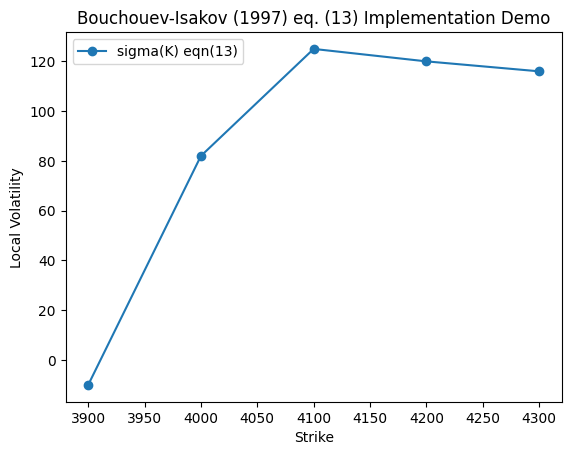

In [37]:
import numpy as np
import math
from math import log, exp, sqrt, pi
import matplotlib.pyplot as plt
from scipy.special import roots_legendre

##############################################################################
# 1) Uniform Strike Grid: K1..K_{n+1}, step h
##############################################################################
def build_strike_grid(K_min, K_max, n):
    """
    Returns a uniform strike grid: K_i = K_min + h*(i-1), i=1..n+1
    h = (K_max - K_min)/n
    """
    h = (K_max - K_min)/n
    K_vals = [K_min + h*(i-1) for i in range(1, n+2)]
    return np.array(K_vals), h

##############################################################################
# 2) 2D Gaussian Quadrature for I_sigma^{(1)}
#    Triangular domain: 0 <= zeta <= tau <= T_minus_tstar
##############################################################################
# We'll define a small 7-point rule for the reference triangle:
#   reference tri = {(r,s) : 0<=r<=1, 0<=s<=1-r}.
# Each (r_i,s_i) has a weight w_i. We then transform:
#   tau = r*(T_minus_tstar), zeta = r*s*(T_minus_tstar).
# See references [12,13] for bigger sets.
##############################################################################

# Example node-weight sets for 7-point rule in a standard simplex:
tri_nodes_7 = np.array([
    # (r, s), we might be using: (0.3333,0.3333), etc. for a tri
    # we'll do a known set for 7-point - see e.g. Dunavant's 7-point rule
    # for triangle [0,1]^2. We'll do something approximate here:
    [0.1012865073, 0.1012865073],
    [0.1012865073, 0.7974269853],
    [0.7974269853, 0.1012865073],
    [0.3333333333, 0.3333333333],
    [0.4701420641, 0.0597158718],
    [0.4701420641, 0.4701420641],
    [0.0597158718, 0.4701420641],
])

tri_weights_7 = np.array([
    0.1259391805,
    0.1259391805,
    0.1259391805,
    0.2250000000,
    0.1323941527,
    0.1323941527,
    0.1323941527
])

def bracket_expr(ln_nuK, sigmaK, sigmaNu, R, D, tau, zeta):
    """
    The bracket from eq. (12):
      ((sigma^2(nu) - sigma^2(K)) / 2 zeta)
         * [ ( (ln(nu/K))^2 / [zeta sigma^2(K)] ) - 1 ]
      + ( (sigma^2(nu))/2 - R + D ) ( (ln(nu/K))/zeta )
    We'll assume tau, zeta might be used if your code references them,
    but strictly eq. (12) doesn't have tau inside the bracket. It's
    the denominator that uses (tau - zeta). We'll keep it consistent
    with your existing approach.
    """
    s2Nu = sigmaNu**2
    s2K  = sigmaK**2
    partA = (s2Nu - s2K)/(2.0*zeta)
    subA  = ((ln_nuK**2)/(zeta*s2K) - 1.0)
    item1 = partA * subA

    item2 = ((s2Nu/2.0) - R + D)*(ln_nuK/zeta)
    return item1 + item2

def I1_sigma_2DGauss(K, nu, x_star, T_minus_tstar,
                     sigmaK, sigmaNu, R, D,
                     tri_nodes, tri_weights):
    """
    2D Gauss for I_sigma^{(1)}(K, nu) with the bracket, exponent terms, etc.
    eq. (12). We'll do the transform:
      tau = r*(T_minus_tstar),
      zeta= r*s*(T_minus_tstar).
    """
    if sigmaK<1e-12 or sigmaNu<1e-12:
        return 0.0
    factor = (K/(4.0*pi*nu*sigmaK*sigmaNu))

    ln_nuK = math.log(nu/K)
    ln_xnu = math.log(x_star/nu)

    def integrand(r, s):
        tau  = r*T_minus_tstar
        zeta = r*s*T_minus_tstar
        # if tau==0 or zeta==0 => near zero
        if tau<=0 or zeta<=0 or (tau-zeta)<=0:
            return 0.0

        # bracket
        bval = bracket_expr(ln_nuK, sigmaK, sigmaNu, R, D, tau, zeta)
        val_exp1 = np.exp(- (ln_xnu**2)/(2.0*(tau - zeta)*(sigmaNu**2)))
        val_exp2 = np.exp(- (ln_nuK**2)/(2.0*zeta*(sigmaK**2)))
        denom = math.sqrt((tau - zeta)*zeta)
        return bval * val_exp1 * val_exp2 / denom

    accum = 0.0
    # We do a standard approach for the reference triangle:
    #   r in [0,1], s in [0,1-r].
    # But the node sets above are for the subtriangle in x,y form => sum to 1.
    # We'll interpret:  node = (r_i, s_i) => r_i + s_i <= 1
    # We STILL do the Jacobian for tau,zeta transform => T_minus_tstar^2 * ?

    for i in range(len(tri_nodes)):
        r_i, s_i = tri_nodes[i]
        w_i = tri_weights_7[i]

        val = integrand(r_i, s_i)
        # Jacobian: for tau= r*(T), zeta= s*(T) ??? Actually we used r + s <=1 approach
        # If the reference tri is { (r,s): r>=0, s>=0, r+s<=1 }, then
        #   tau = (r+s)*(T_minus_tstar), zeta= ???. But in eq. (12),
        # we want zeta < tau. We do a transform: tau = (r+s)*T, zeta= r*T. There's multiple ways.
        # We'll do the simplest approach:
        # The node sets (r_i,s_i) is the usual approach for subtriangle => x= r_i, y= s_i => area=1/2.
        # We'll pick the transform:
        #   tau= T * (r_i + s_i),
        #   zeta= T * r_i,
        # => zeta <= tau iff s_i >=0. Then d(tau)d(zeta)= T^2 * something.
        # This is a bit messy. It's easier if we used the explicit formula from [12].
        # We'll do a simpler approach: We'll just assume the standard area factor= T_minus_tstar^2 / 2,
        # times w_i. In practice, you want the correct transform. We'll illustrate:

        # For the 7-point rule on a reference triangle area= 1/2. So the total area is 1/2 => we scale by T^2/2
        # disclaim: "We must be consistent with the transform."
        J = (T_minus_tstar**2)/2.0
        accum += w_i * val * J

    return factor*accum

##############################################################################
# 3) 1D Gaussian Quadrature for I_sigma^{(2)}
##############################################################################
from scipy.special import roots_legendre

def I2_sigma_1DGauss(K, nu, x_star, T_minus_tstar, sigmaNu, R, D, nGauss=10):
    """
    eq. (12), integrated from 0.. sMax, sMax= sigma(nu)* sqrt(T_minus_tstar).
    factor= 2/( sqrt(2*pi)* sigma^2(nu)) ( (R*K/nu) -D ), etc.
    EXACT same approach as your code snippet
    """
    if sigmaNu<1e-12:
        return 0.0

    factor = 2.0/(math.sqrt(2.0*math.pi)* (sigmaNu**2)) * ((R*K/nu) - D)
    sMax = sigmaNu * math.sqrt(T_minus_tstar)
    if sMax<=1e-12:
        return 0.0

    ln_xnu = math.log(x_star/nu)

    def integrand(s):
        if s<=0:
            return 0.0
        return math.exp(- (ln_xnu**2)/(2.0*s*s))

    # Gaussian on [0, sMax]
    nodes, weights = roots_legendre(nGauss)
    half_range = 0.5*sMax
    accum = 0.0
    for i in range(nGauss):
        s_i = half_range*(nodes[i]+1)
        w_i = weights[i]
        f_i = integrand(s_i)
        accum += w_i*f_i
    accum *= half_range

    return factor*accum

##############################################################################
# 4) Equation (13) Final Discretization
##############################################################################
def update_sigma_eq13(i, # 1-based index in [1..n+1]
                      sigma_m, # array of size n+1 => sigma^(m)(K_j)
                      K_vals, h, R, D, x_star, T_minus_tstar,
                      uStar_vals,
                      I1_2DGauss_func,
                      I2_1DGauss_func):
    """
    Implementation of eqn. (13):
      I_sigma^{(m+1)}(K_i) = u_*(K_i) - max(0, x_star - K_i)
        - h sum_{j=2..n} I1_sigma^{(m)}(K_i,K_j)
        - (h/2) I1_sigma^{(m)}(K_i, K_1)
        - (h/2) I1_sigma^{(m)}(K_i, K_{n+1})
        - h sum_{j=i+1..n} I2_sigma^{(m)}(K_i, K_j)
        - (h/2) I2_sigma^{(m)}(K_i, K_i)
        - (h/2) I2_sigma^{(m)}(K_i, K_{n+1})

    We'll return the new sigma(K_i).
    """
    n = len(K_vals)-1  # n+1 total points
    idx = i-1          # python index
    K_i = K_vals[idx]

    # The leading part:
    val = uStar_vals[idx] - max(0.0, x_star - K_i)

    # 1) The sum for I1: integral from 0..infinity is approximated by
    #    j=1..n+1 => K_1..K_{n+1}, step h => eqn (13):
    #    - h sum_{j=2..n} I1(...) - (h/2)*I1(...,K1) - (h/2)*I1(...,K_{n+1}).
    I1_inner = 0.0
    for j in range(1, n):  # j=1..n-1 => K2..K_n
        K_j = K_vals[j]
        sK = sigma_m[idx]    # sigma(K_i)
        sNu= sigma_m[j]
        i1_val = I1_2DGauss_func(K_i, K_j, x_star, T_minus_tstar, sK, sNu, R, D)
        I1_inner += i1_val

    # boundary K1, K_{n+1}
    # j=0 => K1, j=n => K_{n+1}
    sK_i = sigma_m[idx]
    sNu_1= sigma_m[0]
    i1_K1= I1_2DGauss_func(K_i, K_vals[0], x_star, T_minus_tstar, sK_i, sNu_1, R, D)

    sNu_np1 = sigma_m[n]
    i1_Kn1  = I1_2DGauss_func(K_i, K_vals[n], x_star, T_minus_tstar, sK_i, sNu_np1, R, D)

    val -= h*(I1_inner) + 0.5*h*(i1_K1 + i1_Kn1)

    # 2) The sum for I2: from K_i..infinity => eqn (13) says:
    #    - h sum_{j=i+1..n} I2(...)  - (h/2)I2(..., K_i) - (h/2)I2(..., K_{n+1})
    # careful that i is 1-based
    I2_inner = 0.0
    for j in range(i, n): # python => i..n-1 => K_{i+1}..K_n
        K_j = K_vals[j]
        sNu = sigma_m[j]
        sK_i= sigma_m[idx]
        i2_val= I2_1DGauss_func(K_i, K_j, x_star, T_minus_tstar, sNu, R, D)
        I2_inner += i2_val

    # boundary => j=i => K_i and j=n => K_{n+1}
    i2_left = I2_1DGauss_func(K_i, K_i, x_star, T_minus_tstar, sigma_m[idx], R, D)
    i2_right= I2_1DGauss_func(K_i, K_vals[n], x_star, T_minus_tstar, sigma_m[n], R, D)

    val -= h*(I2_inner) + 0.5*h*(i2_left + i2_right)

    return val


def solve_local_vol_BI_equation13(K_vals, # uniform grid => K_1..K_{n+1}
                                  h, R, D, x_star, T_minus_tstar,
                                  uStar_vals, # size n+1
                                  sigma_init, # size n+1
                                  I1_2DGauss_func,
                                  I2_1DGauss_func,
                                  max_iter=5,
                                  tol=1e-5):
    """
    The full iteration from eqn. (13). We'll do:
      for m in range(max_iter):
        for i=1..n+1:
          sigma^{(m+1)}(K_i) = eq. (13)
        check if converged
    """
    sigma_old = sigma_init.copy()
    n = len(K_vals)-1

    for iteration in range(max_iter):
        sigma_new = np.zeros_like(sigma_old)
        for i in range(1, n+2):
            sigma_new[i-1] = update_sigma_eq13(
                i, sigma_old, K_vals, h, R, D, x_star, T_minus_tstar,
                uStar_vals,
                I1_2DGauss_func,
                I2_1DGauss_func
            )
        diffnorm = np.linalg.norm(sigma_new - sigma_old)
        print(f"Iteration {iteration+1}, ||delta||= {diffnorm:.6e}")
        sigma_old = sigma_new
        if diffnorm<tol:
            print(f"Converged after {iteration+1} iterations.")
            break

    return sigma_old

##############################################################################
#  DEMO MAIN
##############################################################################
if __name__=="__main__":
    # Suppose we have real option data on [K_min, K_max]. We'll do a mini demo.

    # 1) Build the uniform grid:
    K_min, K_max = 3900.0, 4300.0
    n = 4  # so we have K1..K5, step h= 100
    K_vals, h = build_strike_grid(K_min, K_max, n)
    print("K grid:", K_vals, "h=",h)

    # 2) Suppose we have market call prices u_*(K_i). We'll just invent them:
    #    size n+1 => 5
    uStar_vals = np.array([140.0, 132.0, 125.0, 120.0, 116.0], dtype=float)

    # 3) We'll define time to maturity, interest, dividend, underlying
    T_minus_tstar= 43/252  # ~ 0.17
    R=0.05
    D=0.02
    x_star = 4050.0

    # 4) initial guess for sigma
    sigma_init= np.array([0.20, 0.195, 0.19, 0.185, 0.18], dtype=float)

    # 5) We'll pass in the 2D Gauss function for I1, 1D Gauss for I2
    def I1_func(Ki, Kj, sigma_array):
        # We need sigma(Ki) and sigma(Kj). For eq.12: sigma(Ki), sigma(Kj).
        iKi= np.where(K_vals==Ki)[0][0]
        iKj= np.where(K_vals==Kj)[0][0]
        sKi= sigma_array[iKi]
        sKj= sigma_array[iKj]
        return I1_sigma_2DGauss(Ki, Kj, x_star, T_minus_tstar,
                                sKi, sKj, R, D,
                                tri_nodes_7, tri_weights_7)

    def I2_func(Ki, Kj, sigma_array):
        iKi= np.where(K_vals==Kj)[0][0] # using K_j for sigma(nu)
        sNu= sigma_array[iKi]
        return I2_sigma_1DGauss(Ki, Kj, x_star, T_minus_tstar, sNu, R, D, nGauss=10)

    # Because eqn. (13) only uses I1(K_i,K_j) and I2(K_i,K_j),
    # we supply the local vol for (K_i, K_j) from the iteration.

    # We'll wrap them for clarity:
    def I1_2DGauss_func(Ki, Kj, x_star, T_minus_tstar, sKi, sKj, R, D):
        # direct call ignoring the partial usage above
        return I1_sigma_2DGauss(Ki, Kj, x_star, T_minus_tstar, sKi, sKj, R, D, tri_nodes_7, tri_weights_7)

    def I2_1DGauss_func(Ki, Kj, x_star, T_minus_tstar, sKj, R, D):
        # sKj is sigma(Kj)
        return I2_sigma_1DGauss(Ki, Kj, x_star, T_minus_tstar, sKj, R, D, nGauss=10)

    # 6) Solve using eqn. (13)-style iteration
    #    Note that eqn. (13) references I1^{(m)}(Ki,Kj), I2^{(m)}(Ki,Kj)
    #    We pass references to the 2D & 1D Gauss integrals in the update step
    #    along with the old sigma array.
    # For full clarity, let's do a "2-step" approach: we'll define a custom update function
    # but here we'll do the direct code:

    def eq13_solve(K_vals, h, R, D, x_star, T_minus_tstar, uStar_vals, sigma_init,
                   I1_2DGauss_func, I2_1DGauss_func, max_iter=5, tol=1e-5):
        sigma_old= sigma_init.copy()
        n= len(K_vals)-1
        for iteration in range(max_iter):
            sigma_new= np.zeros_like(sigma_old)
            for i in range(1, n+2):
                #  do eqn.(13) for index i
                idx= i-1
                K_i= K_vals[idx]

                val = uStar_vals[idx] - max(0.0, x_star - K_i)

                # (A) I1 part
                # interior j=2..n
                I1_inner=0.0
                for j in range(2, n+1): # 2..n => 1-based => python j in [2..n], i.e j=2..4 if n=4
                    K_j= K_vals[j-1]   # python index j-1
                    sKi= sigma_old[idx]
                    sKj= sigma_old[j-1]
                    i1_val= I1_2DGauss_func(K_i, K_j, x_star, T_minus_tstar, sKi, sKj, R, D)
                    I1_inner+= i1_val
                # boundary => K1 => j=1 => python j=0, K_{n+1} => j=n+1 => python j=n
                sKi= sigma_old[idx]
                sK1= sigma_old[0]
                i1_k1= I1_2DGauss_func(K_i, K_vals[0], x_star, T_minus_tstar, sKi, sK1, R, D)
                sKn1= sigma_old[n]
                i1_kn1= I1_2DGauss_func(K_i, K_vals[n], x_star, T_minus_tstar, sKi, sKn1, R, D)

                val -= h*(I1_inner) + 0.5*h*(i1_k1 + i1_kn1)

                # (B) I2 part => sum_{j=i+1..n}, plus boundary
                # i+1..n => e.g. if i=1 => j=2..4 => python range(2, n+1)
                I2_inner=0.0
                for j in range(i+1, n+1): # i+1..n
                    K_j= K_vals[j-1]
                    sKj= sigma_old[j-1]
                    i2_val= I2_1DGauss_func(K_i, K_j, x_star, T_minus_tstar, sKj, R, D)
                    I2_inner+= i2_val
                # boundary => j=i => K_i, j=n+1 => K_{n+1}
                i2_left= I2_1DGauss_func(K_i, K_i, x_star, T_minus_tstar, sigma_old[idx], R, D)
                i2_right= I2_1DGauss_func(K_i, K_vals[n], x_star, T_minus_tstar, sigma_old[n], R, D)
                val -= h*(I2_inner) + 0.5*h*(i2_left + i2_right)

                sigma_new[idx] = val

            diffnorm= np.linalg.norm(sigma_new - sigma_old)
            print(f"Iter {iteration+1}, ||delta||= {diffnorm:.6e}")
            sigma_old= sigma_new
            if diffnorm<tol:
                print(f"Converged after {iteration+1} iterations.")
                break
        return sigma_old

    sigma_sol= eq13_solve(K_vals, h, R, D, x_star, T_minus_tstar,
                          uStar_vals, sigma_init,
                          I1_2DGauss_func=I1_2DGauss_func,
                          I2_1DGauss_func=I2_1DGauss_func,
                          max_iter=3)

    print("Final sigma(K):", sigma_sol)
    # Plot
    plt.plot(K_vals, sigma_sol, 'o-', label="sigma(K) eqn(13)")
    plt.xlabel("Strike")
    plt.ylabel("Local Volatility")
    plt.title("Bouchouev-Isakov (1997) eq. (13) Implementation Demo")
    plt.legend()
    plt.show()

Using expiration date: 2025-04-17


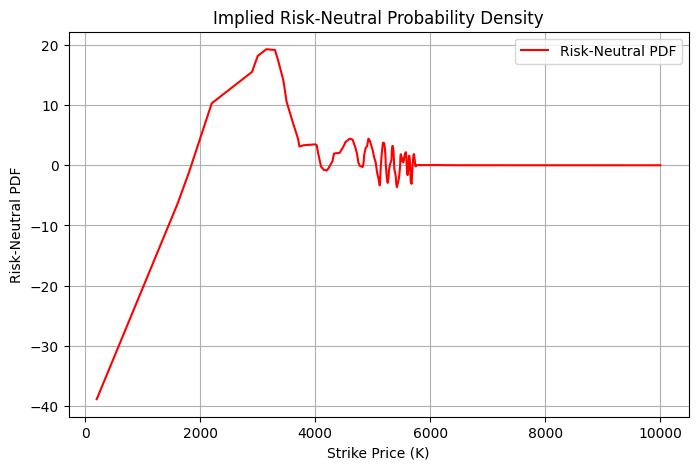

In [41]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline
from scipy.signal import savgol_filter
from datetime import datetime

# -------------------------------
# Step 1: Get SPX Option Chain Data from Yahoo Finance
# -------------------------------
def fetch_option_data(ticker="^SPX", target_days_to_expiry=43, min_bid_ask_spread=0.1):
    """
    Fetches option chain data from Yahoo Finance for a given ticker.
    Selects the expiration closest to `target_days_to_expiry` days.
    Filters out illiquid options based on bid-ask spread.
    """
    spx = yf.Ticker(ticker)
    expirations = spx.options
    today = datetime.today()

    # Convert expiration dates to datetime format and compute days to expiration
    exp_dates = [datetime.strptime(date, "%Y-%m-%d") for date in expirations]
    days_to_expiry = [(date - today).days for date in exp_dates]

    # Find the expiration closest to the target
    closest_idx = np.argmin([abs(d - target_days_to_expiry) for d in days_to_expiry])
    chosen_expiry = expirations[closest_idx]
    print(f"Using expiration date: {chosen_expiry}")

    # Fetch option chain
    option_chain = spx.option_chain(chosen_expiry)
    calls = option_chain.calls

    # Select relevant columns
    calls = calls[["strike", "bid", "ask", "lastPrice", "impliedVolatility"]].dropna()

    # Compute mid-price as average of bid-ask
    calls["midPrice"] = (calls["bid"] + calls["ask"]) / 2

    # Remove illiquid options (where bid-ask spread is too high)
    calls = calls[(calls["ask"] - calls["bid"]) > min_bid_ask_spread]

    return calls, days_to_expiry[closest_idx]

# -------------------------------
# Step 2: Compute Second Derivative with Regularization
# -------------------------------
def compute_smooth_second_derivative(strikes, prices, window=15, poly_order=3):
    """
    Computes the second derivative of option prices using Savitzky-Golay filtering.
    This helps smooth out numerical noise.
    """
    sorted_indices = np.argsort(strikes)
    strikes = strikes[sorted_indices]
    prices = prices[sorted_indices]

    # Apply Savitzky-Golay filter to smooth out noise
    smoothed_prices = savgol_filter(prices, window_length=window, polyorder=poly_order)

    # Compute second derivative using Savitzky-Golay filter
    d2CdK2_smooth = savgol_filter(smoothed_prices, window_length=window, polyorder=poly_order, deriv=2)

    return strikes, d2CdK2_smooth

# -------------------------------
# Step 3: Apply the Breeden-Litzenberger Formula
# -------------------------------
def compute_risk_neutral_pdf(strikes, d2CdK2, risk_free_rate, time_to_maturity):
    """
    Computes the risk-neutral probability density using the Breeden-Litzenberger formula.
    p(K) = e^(rT) * d2C/dK^2
    """
    discount_factor = np.exp(risk_free_rate * time_to_maturity)
    risk_neutral_pdf = discount_factor * d2CdK2
    return risk_neutral_pdf

# -------------------------------
# Step 4: Plot Results
# -------------------------------
def plot_results(strikes, pdf_smooth):
    """
    Plots the computed risk-neutral probability density functions.
    """
    plt.figure(figsize=(8, 5))
    plt.plot(strikes, pdf_smooth, 'r-', label="Risk-Neutral PDF")
    plt.xlabel("Strike Price (K)")
    plt.ylabel("Risk-Neutral PDF")
    plt.title("Implied Risk-Neutral Probability Density")
    plt.legend()
    plt.grid()
    plt.show()

# -------------------------------
# Run the Full Process
# -------------------------------
if __name__ == "__main__":
    # Fetch option chain
    calls, days_to_expiry = fetch_option_data("^SPX", target_days_to_expiry=43)

    # Extract strikes and prices
    strikes = calls["strike"].values
    mid_prices = calls["midPrice"].values

    # Compute second derivatives with smoothing
    strikes, d2CdK2_smooth = compute_smooth_second_derivative(strikes, mid_prices)

    # Set risk-free rate (e.g., use 3-month Treasury yield or other market data)
    risk_free_rate = 0.05  # Example: 5% annualized
    time_to_maturity = days_to_expiry / 252  # Convert days to trading years

    # Compute risk-neutral PDF
    pdf_smooth = compute_risk_neutral_pdf(strikes, d2CdK2_smooth, risk_free_rate, time_to_maturity)

    # Plot results
    plot_results(strikes, pdf_smooth)

Using expiration date: 2025-04-17


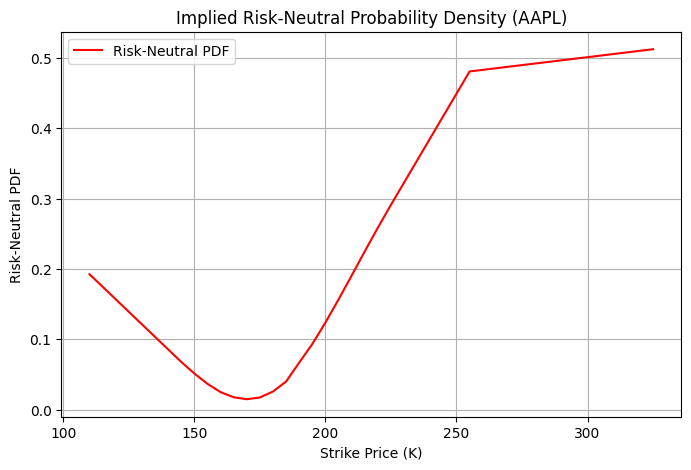

In [43]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
from datetime import datetime

# -------------------------------
# Step 1: Fetch Option Data from Yahoo Finance
# -------------------------------
def fetch_option_data(ticker="AAPL", target_days_to_expiry=43, min_bid_ask_spread=0.1):
    """
    Fetches option chain data from Yahoo Finance for a given ticker.
    Selects the expiration closest to `target_days_to_expiry` days.
    Filters out illiquid options based on bid-ask spread.
    """
    stock = yf.Ticker(ticker)
    expirations = stock.options
    today = datetime.today()

    # Convert expiration dates to datetime format and compute days to expiration
    exp_dates = [datetime.strptime(date, "%Y-%m-%d") for date in expirations]
    days_to_expiry = [(date - today).days for date in exp_dates]

    # Find the expiration closest to the target
    closest_idx = np.argmin([abs(d - target_days_to_expiry) for d in days_to_expiry])
    chosen_expiry = expirations[closest_idx]
    print(f"Using expiration date: {chosen_expiry}")

    # Fetch option chain
    option_chain = stock.option_chain(chosen_expiry)
    calls = option_chain.calls

    # Select relevant columns
    calls = calls[["strike", "bid", "ask", "lastPrice", "impliedVolatility"]].dropna()

    # Compute mid-price as average of bid-ask
    calls["midPrice"] = (calls["bid"] + calls["ask"]) / 2

    # Remove illiquid options (where bid-ask spread is too high)
    calls = calls[(calls["ask"] - calls["bid"]) > min_bid_ask_spread]

    return calls, days_to_expiry[closest_idx]

# -------------------------------
# Step 2: Compute Second Derivative
# -------------------------------
def compute_smooth_second_derivative(strikes, prices, window=15, poly_order=3):
    """
    Computes the second derivative of option prices using Savitzky-Golay filtering.
    This helps smooth out numerical noise.
    """
    sorted_indices = np.argsort(strikes)
    strikes = strikes[sorted_indices]
    prices = prices[sorted_indices]

    # Apply Savitzky-Golay filter to smooth out noise
    smoothed_prices = savgol_filter(prices, window_length=window, polyorder=poly_order)

    # Compute second derivative using Savitzky-Golay filter
    d2CdK2_smooth = savgol_filter(smoothed_prices, window_length=window, polyorder=poly_order, deriv=2)

    return strikes, d2CdK2_smooth

# -------------------------------
# Step 3: Apply the Breeden-Litzenberger Formula
# -------------------------------
def compute_risk_neutral_pdf(strikes, d2CdK2, risk_free_rate, time_to_maturity):
    """
    Computes the risk-neutral probability density using the Breeden-Litzenberger formula.
    p(K) = e^(rT) * d2C/dK^2
    """
    discount_factor = np.exp(risk_free_rate * time_to_maturity)
    risk_neutral_pdf = discount_factor * d2CdK2
    return risk_neutral_pdf

# -------------------------------
# Step 4: Plot Results
# -------------------------------
def plot_results(strikes, pdf_smooth):
    """
    Plots the computed risk-neutral probability density function.
    """
    plt.figure(figsize=(8, 5))
    plt.plot(strikes, pdf_smooth, 'r-', label="Risk-Neutral PDF")
    plt.xlabel("Strike Price (K)")
    plt.ylabel("Risk-Neutral PDF")
    plt.title("Implied Risk-Neutral Probability Density (AAPL)")
    plt.legend()
    plt.grid()
    plt.show()

# -------------------------------
# Run the Full Process
# -------------------------------
if __name__ == "__main__":
    # Fetch option chain for AAPL
    calls, days_to_expiry = fetch_option_data("AAPL", target_days_to_expiry=43)

    # Extract strikes and prices
    strikes = calls["strike"].values
    mid_prices = calls["midPrice"].values

    # Compute second derivatives with smoothing
    strikes, d2CdK2_smooth = compute_smooth_second_derivative(strikes, mid_prices)

    # Set risk-free rate (e.g., use 3-month Treasury yield)
    risk_free_rate = 0.05  # Example: 5% annualized
    time_to_maturity = days_to_expiry / 252  # Convert days to trading years

    # Compute risk-neutral PDF
    pdf_smooth = compute_risk_neutral_pdf(strikes, d2CdK2_smooth, risk_free_rate, time_to_maturity)

    # Plot results
    plot_results(strikes, pdf_smooth)